In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs,make_moons
plt.style.use("seaborn-v0_8")

In [33]:
#x,y = make_blobs(n_samples=500,centers=2,n_features = 2, random_state=10)
x,y = make_moons(n_samples = 1000,shuffle = True,noise = 0.2,random_state = 1)
print(x.shape,y.shape)

(1000, 2) (1000,)


In [4]:
y

array([0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,

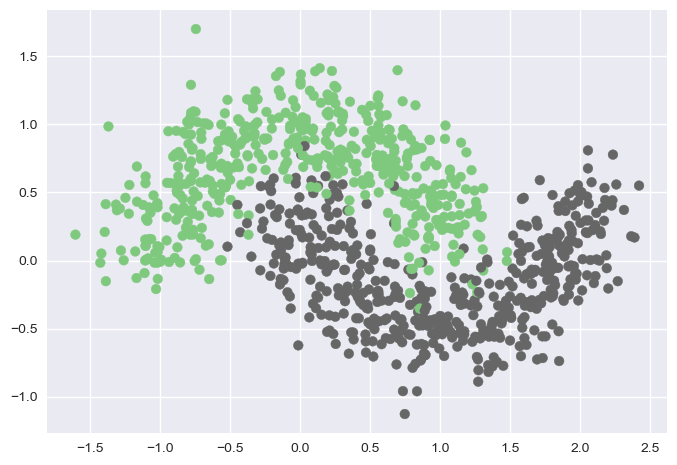

In [34]:
plt.scatter(x[:,0],x[:,1], c=y, cmap = plt.cm.Accent)

In [11]:
def sigmoid(z):
    return (1.0/(1+np.exp(-z)))

In [35]:
#broadcasting
z = np.array([1,2,3,4,5])
sigmoid(z)

array([0.73105858, 0.88079708, 0.95257413, 0.98201379, 0.99330715])

In [22]:
def predict(x,weights):
    # x-> m x (n+1) matrix W -> n x 1 vector
    z = np.dot(x,weights)
    predictions = sigmoid(z)
    return predictions

def loss(x,y,weights):
    # binary cross entropy /log likelihood
    y_ = predict(x,weights)
    cost = np.mean(-y*np.log(y_) - (1-y)*np.log(1-y_))
    return cost

def update(x,y,weights,learning_rate):
    # define the update rule for one particular epoch
    y_ = predict(x,weights)
    dw = np.dot(x.T,(y_ - y))

    m = x.shape[0]
    weights = weights - learning_rate*dw/(float(m))
    return weights

def train(x,y,learning_rate,maxEpochs = 100):
    ones = np.ones((x.shape[0],1))
    x = np.hstack((ones,x))
    #initialising the weights
    weights = np.zeros(x.shape[1])

    # itirate and use update function
    for epoch in range(maxEpochs):
        weights = update(x,y,weights,learning_rate)
        if epoch%10 ==0:
            l = loss(x,y,weights)
            print("Epoch Number %d Loss function %.4f"%(epoch,l))

    return weights


        

In [36]:
 weights = train(x,y,learning_rate=0.02,maxEpochs=500)

Epoch Number 0 Loss function 0.6912
Epoch Number 10 Loss function 0.6731
Epoch Number 20 Loss function 0.6564
Epoch Number 30 Loss function 0.6410
Epoch Number 40 Loss function 0.6267
Epoch Number 50 Loss function 0.6135
Epoch Number 60 Loss function 0.6012
Epoch Number 70 Loss function 0.5898
Epoch Number 80 Loss function 0.5792
Epoch Number 90 Loss function 0.5693
Epoch Number 100 Loss function 0.5600
Epoch Number 110 Loss function 0.5513
Epoch Number 120 Loss function 0.5431
Epoch Number 130 Loss function 0.5354
Epoch Number 140 Loss function 0.5282
Epoch Number 150 Loss function 0.5213
Epoch Number 160 Loss function 0.5149
Epoch Number 170 Loss function 0.5088
Epoch Number 180 Loss function 0.5030
Epoch Number 190 Loss function 0.4975
Epoch Number 200 Loss function 0.4923
Epoch Number 210 Loss function 0.4873
Epoch Number 220 Loss function 0.4826
Epoch Number 230 Loss function 0.4781
Epoch Number 240 Loss function 0.4738
Epoch Number 250 Loss function 0.4698
Epoch Number 260 Loss f

# visualizations and predictions

In [25]:
def get_preds(x_test,weights,labels = True):
    if x_test.shape[1] != weights.shape[0]:
        ones = np.ones(x_test.shape[0],1)
        x_test = np.hstack(ones,x_test)

    probs = predict(x_test,weights)

    if not labels:
        return probs
    else:
        labels = np.zeros(probs)
        labels[probs >=0.5] = 1
        return labels

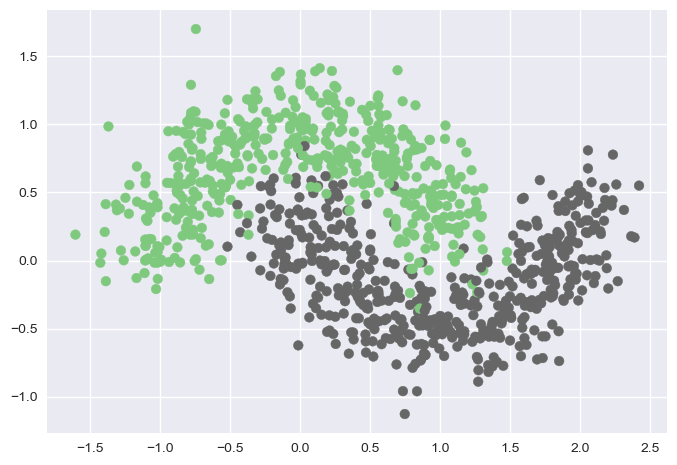

In [37]:
plt.scatter(x[:,0],x[:,1], c=y, cmap = plt.cm.Accent)

In [38]:
weights

array([-0.14113002,  0.96435286, -1.23400058])

In [40]:
x1 = np.linspace(-2,3,10)
print(x1)

x2 = -(weights[0]+weights[1]*x1)/weights[2]
print(x2)

[-2.         -1.44444444 -0.88888889 -0.33333333  0.22222222  0.77777778
  1.33333333  1.88888889  2.44444444  3.        ]
[-1.67733773 -1.24317943 -0.80902114 -0.37486284  0.05929545  0.49345375
  0.92761204  1.36177034  1.79592863  2.23008693]


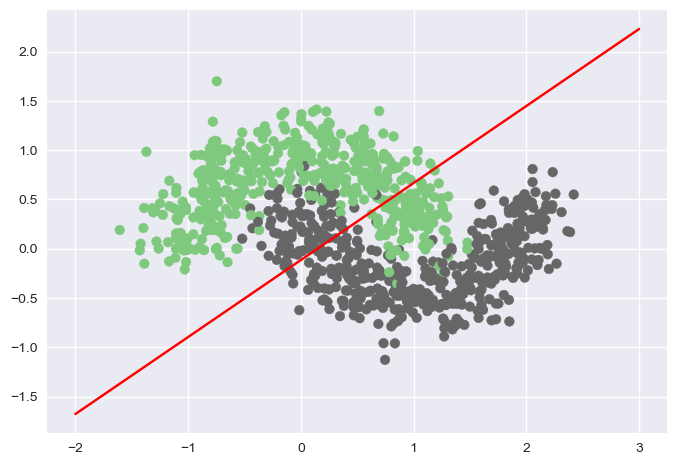

In [41]:
plt.scatter(x[:,0],x[:,1], c=y, cmap = plt.cm.Accent)
plt.plot(x1,x2,c="red")